Równanie przewodnictwa cieplnego:

\begin{equation*}
\frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
\end{equation*}

\begin{equation*}
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2}
\end{equation*}


\begin{equation*}
\frac{\partial^2 u}{\partial y^2} \approx \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{(\Delta y)^2}
\end{equation*}

Gdzie:
- u - temperatura,
- t - czas,
- $ \alpha $ - współczynnik przewodzenia ciepła,
- x i y - współrzędne przestrzenne,
- $ \Delta x $ i $\Delta y $ - kroki przestrzenne wzdłuż osi x i y 
- $ u_{i,j} $ - temperatura w punkcie $ (x_i, y_j) $.


Metoda różnic skończonych (finite difference method) 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

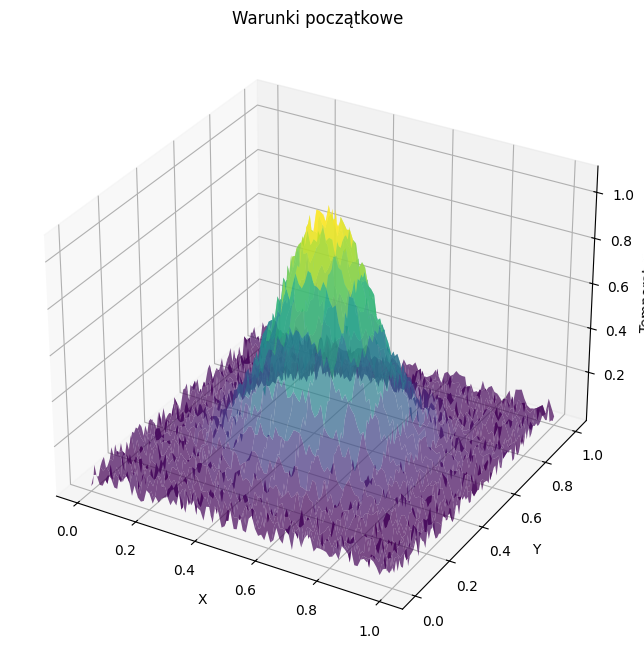

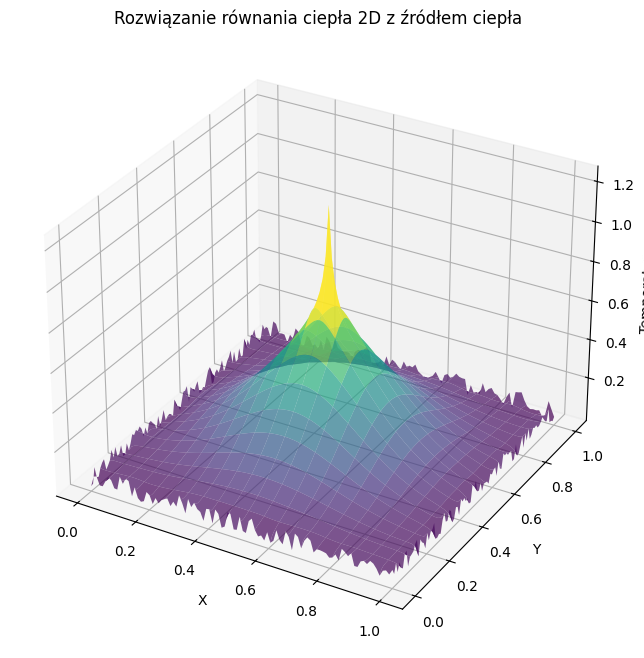

In [9]:

# Parametry symulacji
Lx = Ly = 1.0  # Rozmiary obszaru
Nx = Ny = 100  # Liczba punktów siatki w każdym kierunku
T = 1.0       # Czas trwania symulacji
alpha = 0.01  # Współczynnik przewodzenia ciepła
source_x, source_y = 0.5, 0.5  # Położenie źródła ciepła

# Krok czasowy i przestrzenny
dt = 0.0001
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)

# Tworzenie siatki
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Warunki początkowe
u = np.exp(-((X - source_x)**2 + (Y - source_y)**2) / (2 * 0.02))
u[:, :] += 0.1 * np.random.rand(Nx, Ny)  # Dodanie szumu

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis', rstride=5, cstride=5, alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Temperatura')
ax.set_title('Warunki początkowe')

plt.show()

# Symulacja równania ciepła z źródłem ciepła
for t in np.arange(0, T, dt):
    u[1:-1, 1:-1] += alpha * dt * (
        (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[:-2, 1:-1]) / dx**2 +
        (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, :-2]) / dy**2
    )
    u[int(source_x / Lx * Nx), int(source_y / Ly * Ny)] += 0.1  # Źródło ciepła

# Wykres wyników
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis', rstride=5, cstride=5, alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Temperatura')
ax.set_title('Rozwiązanie równania ciepła 2D z źródłem ciepła')

plt.show()